In [17]:
!wget https://www.dropbox.com/s/dtw18saps0231yn/BrainTumorData.zip?d1=0

--2021-08-01 17:27:45--  https://www.dropbox.com/s/dtw18saps0231yn/BrainTumorData.zip?d1=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/dtw18saps0231yn/BrainTumorData.zip [following]
--2021-08-01 17:27:45--  https://www.dropbox.com/s/raw/dtw18saps0231yn/BrainTumorData.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc19cc589196ce769bfcac4f2bc1.dl.dropboxusercontent.com/cd/0/inline/BTYshOiZBvn926RKDqgiDPnTboFdU4YAH_yqS0Qgm1fWWGWRqJ8EMswhPOU9ZwRvaq4s3mRO-xTOyyMyIZpLLq33aHZyUXNWZ7uCja7oN88O5I1GRefa5nu_l1yzVFi4ZVo1OT4oN6KtqUSQDszv-nLI/file# [following]
--2021-08-01 17:27:45--  https://uc19cc589196ce769bfcac4f2bc1.dl.dropboxusercontent.com/cd/0/inline/BTYshOiZBvn926RKDqgiDPnTboFdU4YAH_yqS0Qgm1fWWGWRqJ8EMswhPOU9ZwRvaq4

In [18]:
!unzip /content/BrainTumorData.zip?d1=0

Archive:  /content/BrainTumorData.zip?d1=0
   creating: BrainTumorData/Brain Tumor Data Set/
   creating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import math
import glob

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
ROOT_DIR = '/content/BrainTumorData/Brain Tumor Data Set'
number_of_images = {}

In [22]:
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))
number_of_images

{'Brain Tumor': 2513, 'Healthey': 2087}

In [23]:
if not os.path.exists('./train'):
  os.mkdir('./train')
  for dir in os.listdir(ROOT_DIR):
    os.makedirs('./train/'+dir)
    for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR,dir)),size=(math.floor(70/100*number_of_images[dir])-5),replace=False):
      O = os.path.join(ROOT_DIR,dir,img)
      D = os.path.join("./train",dir)
      shutil.copy(O,D)
      os.remove(O)
else:
  print("folder exists")

In [24]:
def dataFolder(p,split):
  if not os.path.exists('./'+p):
    os.mkdir('./'+p)
    for dir in os.listdir(ROOT_DIR):
      os.makedirs('./'+p+'/'+dir)
      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR,dir)),size=(math.floor(split*number_of_images[dir])-5),replace=False):
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join("./"+p,dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print(f"{p}folder exists")


In [25]:
dataFolder('train',0.7)

trainfolder exists


In [26]:
dataFolder('val',0.15)

In [27]:
dataFolder('test',0.15)

In [28]:
number_of_images = {}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))
number_of_images.items()

dict_items([('Healthey', 16), ('Brain Tumor', 17)])

# Model Build

In [29]:
from keras.layers import MaxPool2D,Conv2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import load_img,img_to_array
import keras

In [30]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))

model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0

In [31]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

#### preparing our data using ImageDataGenerator




In [32]:
from keras.preprocessing.image import ImageDataGenerator

In [33]:
def preprocessingImages(path):
  image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path,batch_size=32,target_size=(224,224),class_mode="binary")
  return image

In [34]:
train_path = '/content/train'
train_data = preprocessingImages(train_path)

Found 3209 images belonging to 2 classes.


In [36]:
number_of_images = {}
for dir in os.listdir('/content/val'):
  number_of_images[dir] = len(os.listdir(os.path.join('/content/val',dir)))
number_of_images.items()

dict_items([('Healthey', 308), ('Brain Tumor', 371)])

In [37]:
def preprocessingImages2(path):
  image_data = ImageDataGenerator(rescale=1/255)
  image = image_data.flow_from_directory(directory=path,batch_size=32,target_size=(224,224),class_mode="binary")
  return image

In [38]:
val_path = '/content/val'
val_data = preprocessingImages2(val_path)

Found 679 images belonging to 2 classes.


In [39]:
test_path = '/content/test'
test_data = preprocessingImages2(test_path)

Found 679 images belonging to 2 classes.


In [42]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

ec = EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=6,verbose=1,mode='auto')

mc = ModelCheckpoint(monitor="val_accuracy", filepath="./bestModel.h5", verbose=1, save_best_only=True, mode='auto')

cd = [ec,mc]

In [43]:
history = model.fit_generator(generator=train_data,steps_per_epoch=8,epochs=30,verbose=1,validation_data=val_data,validation_steps=16,callbacks=cd)

Epoch 1/30
8/8 [==============================] - 51s 718ms/step - loss: 0.7932 - accuracy: 0.4560 - val_loss: 0.6798 - val_accuracy: 0.5996

Epoch 00001: val_accuracy improved from -inf to 0.59961, saving model to ./bestModel.h5
Epoch 2/30
8/8 [==============================] - 5s 673ms/step - loss: 0.6762 - accuracy: 0.5823 - val_loss: 0.6565 - val_accuracy: 0.6348

Epoch 00002: val_accuracy improved from 0.59961 to 0.63477, saving model to ./bestModel.h5
Epoch 3/30
8/8 [==============================] - 5s 689ms/step - loss: 0.6562 - accuracy: 0.6424 - val_loss: 0.6481 - val_accuracy: 0.6035

Epoch 00003: val_accuracy did not improve from 0.63477
Epoch 4/30
8/8 [==============================] - 5s 675ms/step - loss: 0.6755 - accuracy: 0.6069 - val_loss: 0.6309 - val_accuracy: 0.6270

Epoch 00004: val_accuracy did not improve from 0.63477
Epoch 5/30
8/8 [==============================] - 5s 674ms/step - loss: 0.6490 - accuracy: 0.6004 - val_loss: 0.6021 - val_accuracy: 0.6367

Epoch

In [47]:
h = history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

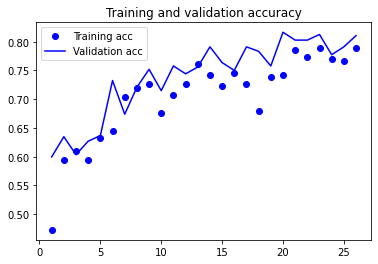

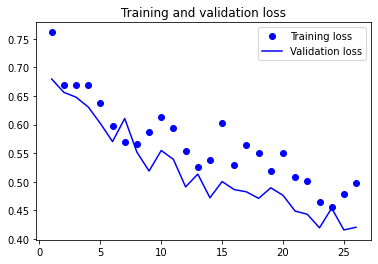

In [48]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [49]:
from keras.models import load_model

model = load_model('/content/bestModel.h5')

# Model_Accuracy

In [50]:
acc = model.evaluate_generator(test_data)[1]

print(f"Accuracy of the model {acc}")

Accuracy of the model 0.8100147247314453


In [57]:
from keras.preprocessing.image import load_img,img_to_array

path = "/content/BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1339).jpg"

img = load_img(path, target_size=(224,224))

in_arr = img_to_array(img)/255

in_arr.shape

input_arr = np.expand_dims(in_arr,axis=0)

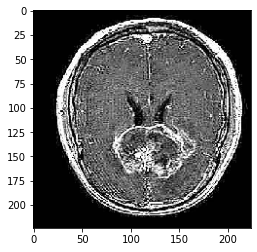


MRI is having Tumor


In [59]:
pred = model.predict_classes(input_arr)[0][0]

plt.imshow(in_arr)
plt.show()


if pred==0:
  print('\nMRI is having Tumor')
else:
  print('MRI is not having a Tumor')

In [55]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthey': 1}